<a href="https://colab.research.google.com/github/Saish31/AIML/blob/main/Finding_Duplicates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding Duplicated Images & Near Duplicates

In [ ]:
%pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch
import os

In [ ]:
!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

In [ ]:
!unzip 'unsplash-25k-photos.zip' -d 'photos'

In [ ]:
img_names = list(glob.glob('photos/*.jpg'))[:2000]
print(len(img_names))

2000


In [ ]:
model = SentenceTransformer('clip-ViT-B-32')
img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True)

In [ ]:
duplicates = util.paraphrase_mining_embeddings(img_embed, top_k=5)

0.9724968671798706


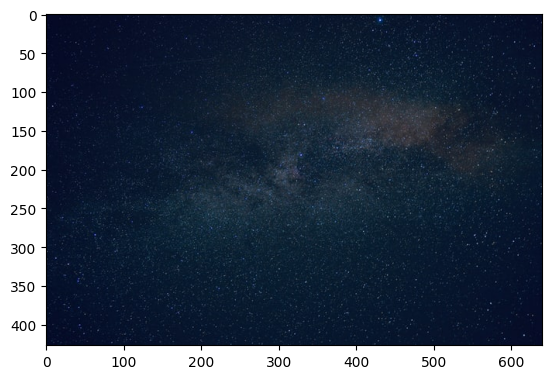

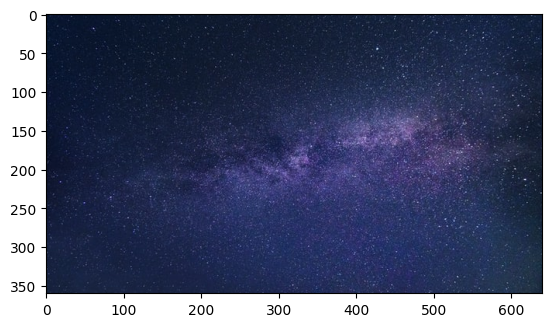

-------------------------------



0.9707629084587097


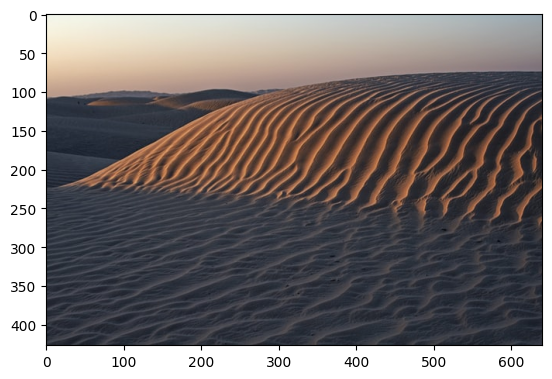

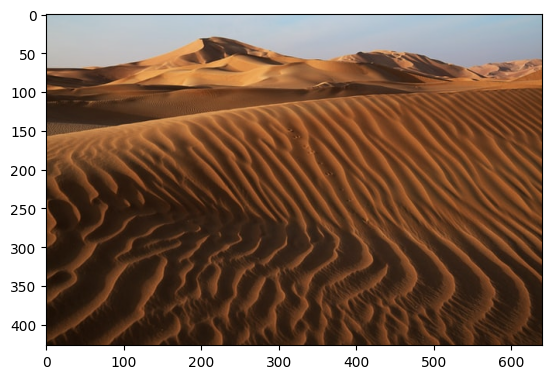

-------------------------------



0.9705447554588318


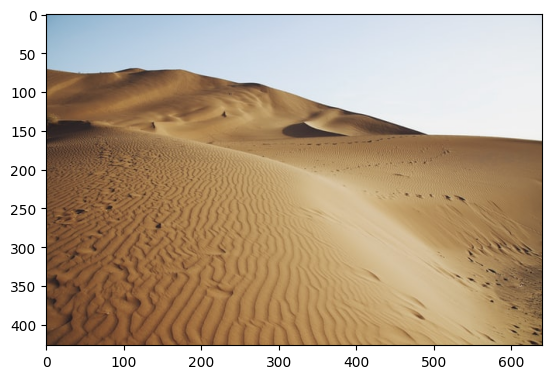

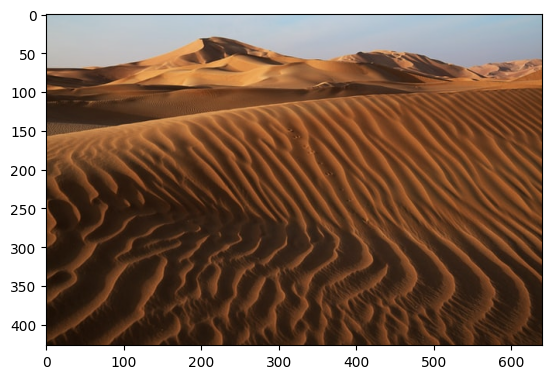

-------------------------------



0.9698619246482849


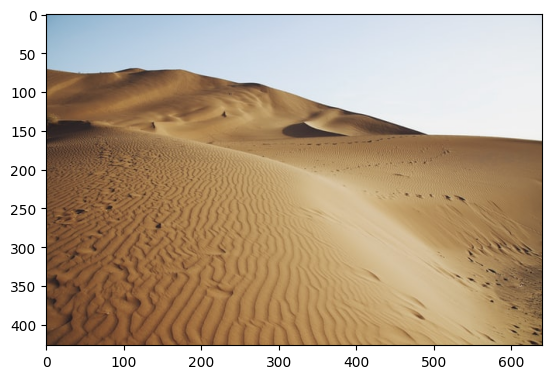

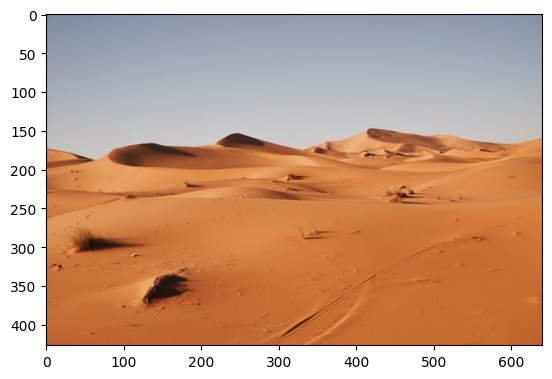

-------------------------------



0.9680100083351135


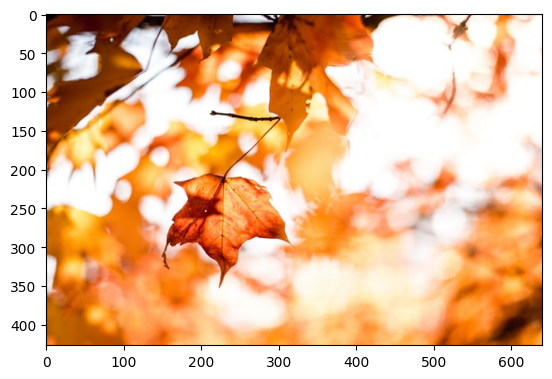

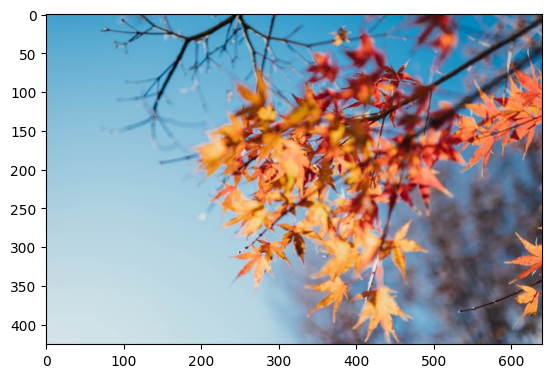

-------------------------------





In [ ]:
for score, idx1, idx2 in duplicates[0:5]:
  print(score)
  img_path = img_names[idx1]
  im = Image.open(img_path)
  plt.figure()
  plt.imshow(im)
  plt.show()

  img_path = img_names[idx2]
  im = Image.open(img_path)
  plt.figure()
  plt.imshow(im)
  plt.show()

  print("-------------------------------\n\n\n")
